## Group Project
### Group Members
1. Rachael Nyawira
2. Winnie Odoyo
3. Austin Kanja


## Problem Statement
In an age of content overload, users are also overwhelmed with too many films on streaming services. Customized recommendations would enhance user engagement and satisfaction.

This project aims to build a movie recommendation system that intelligently suggests the top 5 movies a user is likely to enjoy, based on their previous movie ratings. By leveraging collaborative filtering techniques, the system will analyze user preferences and movie similarities to generate tailored suggestions

### Business Understanding 
#### Context

Businesses like Netflix, Amazon Prime, and Hulu rely heavily on recommendation systems to keep users engaged and increase watch time. A well designed recommendation system will:

1. Retain users

2. Enhance user experience

3. Increase revenue from subscriptions

The capacity to narrow down user preferences and recommend movies will not only lead to greater customer sattisfaction;it may also contribute to improving other important business metrics, such as:

1. Rate of click-through

2. Time user spent on the platform 

3. Content discovery

Having a strong recommendation engine is a competitive advantage in the entertainement industry.

### Objectives
1.	Explore and analyze the MovieLens 100K dataset to understand user preferences and movie popularity.

2.	Perform data cleaning and exploratory data analysis (EDA).

3.	Create a user-item interaction matrix to model the relationships between users and movies.


4.	Implement collaborative filtering techniques (e.g., item-based similarity) to generate recommendations.

5.	Build a function to return the top 5 recommended movies for a specific user.

6.	Evaluate the effectiveness of the model using appropriate metrics.

7.	Visualize and interpret the results to derive meaningful business insights.

## 1. Data Cleaning 

#### 1.1 Importing Libraries

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import sys
import sklearn
import sklearn.preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import os


#### 1.2 Load the data

In [3]:
# load movie dataset
movies_df = pd.read_csv('ml-latest-small/movies.csv')

In [4]:
# load ratings dataset
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')

In [5]:
# load links dataset
links_df = pd.read_csv('ml-latest-small/links.csv')

In [6]:
# load tags dataset
tags_df = pd.read_csv('ml-latest-small/tags.csv')

#### 1.3 Checking for missing values and duplicates

In [7]:
 #A function to inspect the dataframe shape, datatype and missing values

def inspection(Df):
    #The datatypes and shape of each column
    info=Df.info()
    #The nulls in the dataset
    nulls=Df.isnull().sum()
    #Checking for duplicates
    duplicate=Df.duplicated().sum()
    return info,nulls,duplicate
info,nulls,duplicate=inspection(movies_df)
print(info,'\n')
print(f'-------------nulls---------\n{nulls},\n')
print(f'-------------duplicates--------\n{duplicate}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None 

-------------nulls---------
movieId    0
title      0
genres     0
dtype: int64,

-------------duplicates--------
0


In [8]:
# A function to inspect the dataframe shape, datatype and missing values for ratings_df
def inspection(Df):
    #The datatypes and shape of each column
    info=Df.info()
    #The nulls in the dataset
    nulls=Df.isnull().sum()
    #Checking for duplicates
    duplicate=Df.duplicated().sum()
    return info,nulls,duplicate
info,nulls,duplicate=inspection(ratings_df)
print(info,'\n')
print(f'-------------nulls---------\n{nulls},\n')
print(f'-------------duplicates--------\n{duplicate}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None 

-------------nulls---------
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64,

-------------duplicates--------
0


In [9]:
# A function to inspect the dataframe shape, datatype and missing values
def inspection(Df):
    #The datatypes and shape of each column
    info=Df.info()
    #The nulls in the dataset
    nulls=Df.isnull().sum()
    #Checking for duplicates
    duplicate=Df.duplicated().sum()
    return info,nulls,duplicate
info,nulls,duplicate=inspection(tags_df)
print(info,'\n')
print(f'-------------nulls---------\n{nulls},\n')
print(f'-------------duplicates--------\n{duplicate}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None 

-------------nulls---------
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64,

-------------duplicates--------
0


In [10]:
def inspection(Df):
    #The datatypes and shape of each column
    info=Df.info()
    #The nulls in the dataset
    nulls=Df.isnull().sum()
    #Checking for duplicates
    duplicate=Df.duplicated().sum()
    return info,nulls,duplicate
info,nulls,duplicate=inspection(links_df)
print(info,'\n')
print(f'-------------nulls---------\n{nulls},\n')
print(f'-------------duplicates--------\n{duplicate}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None 

-------------nulls---------
movieId    0
imdbId     0
tmdbId     8
dtype: int64,

-------------duplicates--------
0


#### 1.4 Dropping the missing values

In [11]:
# Cleaning the links dataframe to remove rows with NaN values in 'tmdbId'
links_cleaned = links_df.dropna(subset=['tmdbId'])
links_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9734 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9734 non-null   int64  
 1   imdbId   9734 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 304.2 KB


#### 1.5 Merging movies and ratings dataframes

In [12]:
# Merging the movies dataframe with the ratings dataframe on 'movieId'
merged_df = pd.merge(movies_df, ratings_df, on='movieId', how='left')
merged_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


## 2.Exploratory Data Analysis(EDA) 

### 2.1 Descriptive Statistics

In [13]:
# describing the merged dataframe to get an overview of its statistics
merged_df.describe()

,movieId,userId,rating,timestamp
count,100854.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.051728,326.127564,3.501557,1.205946e+09
std,35528.850950,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8128.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


### 2.2 Number of Users and Movies

In [14]:
# Getting the number of unique movies and users in the merged dataframe
# This will help in understanding the scale of the dataset
num_movies = merged_df['movieId'].nunique()
num_users = merged_df['userId'].nunique()

print(f'Number of unique movies: {num_movies}')
print(f'Number of unique users: {num_users}')

Number of unique movies: 9742
Number of unique users: 610


#### 2.3 Univariate Analysis
##### 2.3.1 Ratings Distribution

C:\Users\User\AppData\Local\Temp\ipykernel_2700\2235423747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=merged_df, palette='viridis')


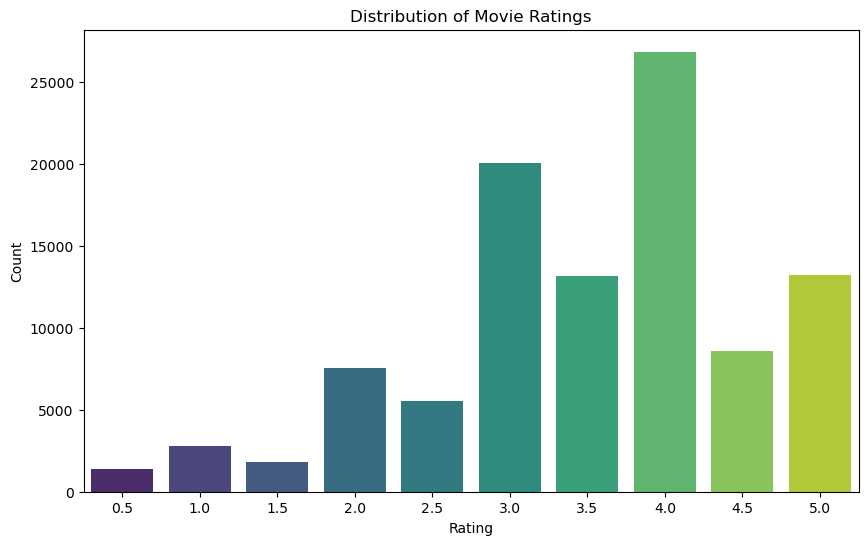

In [15]:
# plotting the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=merged_df, palette='viridis')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## Observation 
From the visualization above we observe that 4.0 is the highest rating while 0.5 is the lowest rating.
We also observe most movies are rated 3.0 and above.

##### 2.3.2 Genre Distribution

C:\Users\User\AppData\Local\Temp\ipykernel_2700\2062112202.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


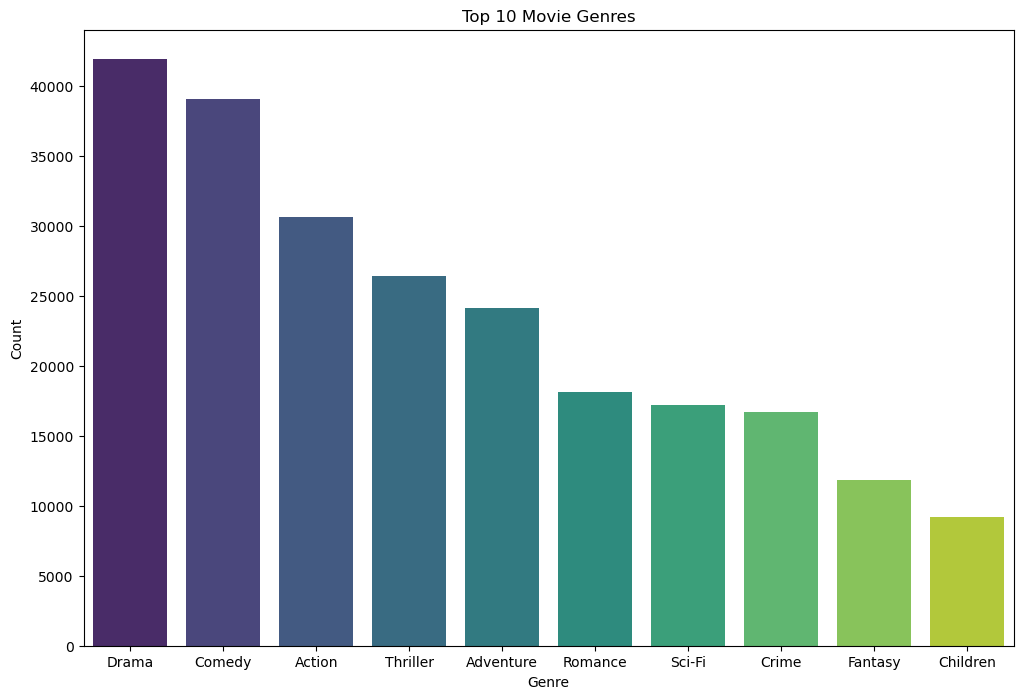

In [16]:
top_genres = merged_df['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

## Observation
Within the dataset, the Drama genre is the most prevalent, with over 42,000 entries, followed by Comedy and Action. These three genres overwhelmingly dominate the dataset, suggesting a strong preference or availability for these genres. However, genres such as Crime, Fantasy, and Children have significantly fewer entries, and may hinder the case of diversity and balance in recommendations.

#### 2.4 Bivariate Analysis
##### 2.4.1 Average Ratings by Genres

C:\Users\User\AppData\Local\Temp\ipykernel_2700\1371310661.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_ratings.index, y=genre_ratings.values, palette='viridis')


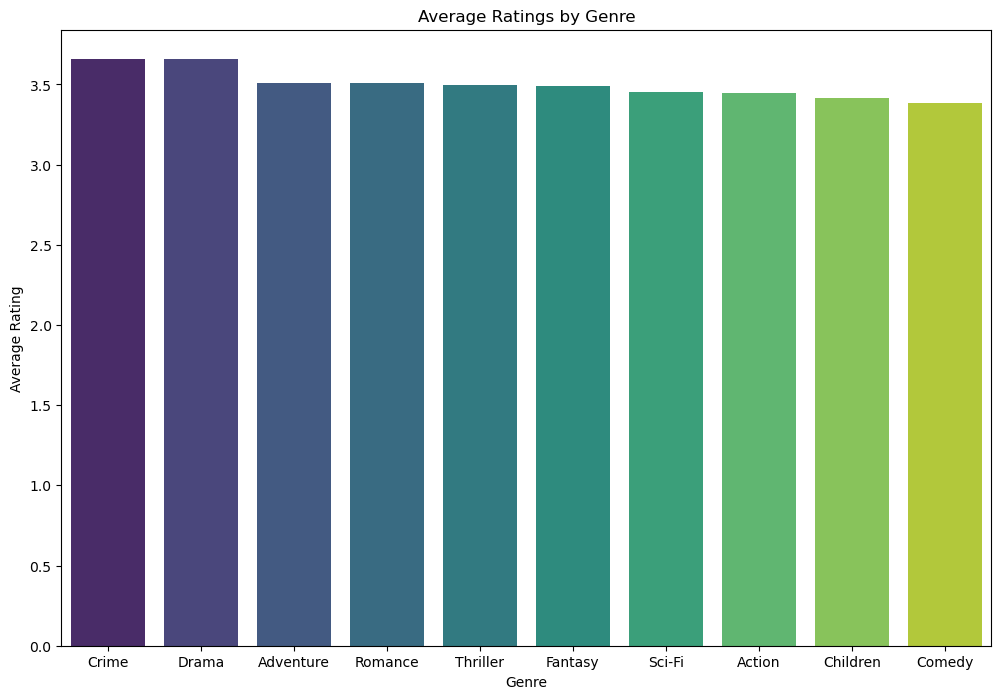

In [17]:
# Create one-hot encoded genre columns
genre_dummies = merged_df['genres'].str.get_dummies(sep='|')

# Combine with merged_df to get ratings and genres together
ratings_with_genres = pd.concat([merged_df[['movieId', 'title', 'rating']], genre_dummies], axis=1)

# plotting ratings by genre
melted = ratings_with_genres.melt(
	id_vars=['movieId', 'title', 'rating'],
	value_vars=top_genres.index.tolist(),
	var_name='genre',
	value_name='is_genre'
)
genre_ratings = melted[melted['is_genre'] == 1].groupby('genre')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_ratings.index, y=genre_ratings.values, palette='viridis')
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

## Observation
Comparing the averages of the genres, Crime and Drama have the highest average ratings at both just above 3.5, suggesting that users are more likely to appreciate serious, story-driven content. In comparison, genres such as Children, Comedy, and Animation have average ratings closer to 3.0, suggesting that these types of movies have more specific tastes or are rated more harshly. This information can help inform the recommendation system so that genre preferences are treated differently when making high-rated movie recommendations

##### 2.4.2 Ratings vs Number of Ratings

Text(0, 0.5, 'Frequency')

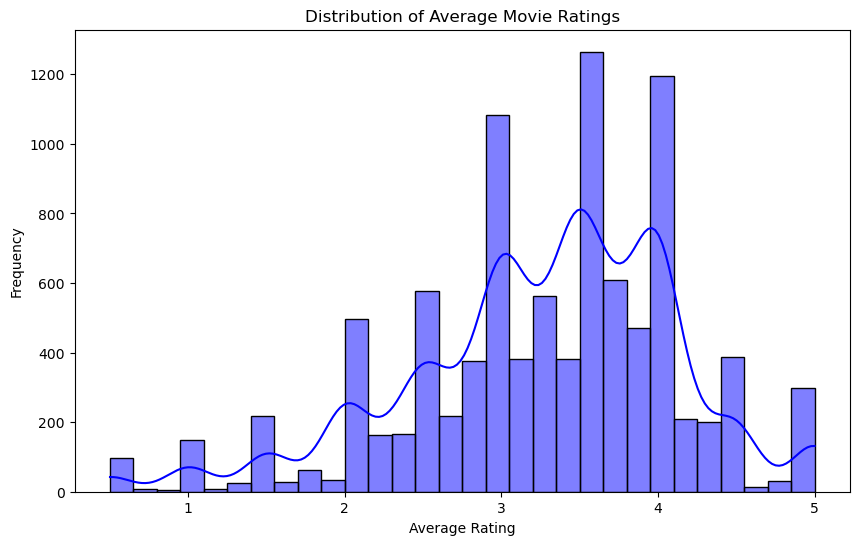

In [18]:
# Analyzing the average ratings for each movie
# Grouping by 'movieId' and calculating the mean and count of ratings
movie_stats = merged_df.groupby('movieId').agg({
    'rating': ['mean', 'count']})
movie_stats.columns = ['mean_rating', 'rating_count']

# plotting the distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(movie_stats['mean_rating'], bins=30, kde=True, color='blue')
plt.title('Distribution of Average Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')


## Observation
The distribution of the average movie ratings is slightly positively skewed, where most movies average ratings between a rating of 3.0 and 4.0. The peak rating appears to be around a rating of 3.5. Therefore, there was seen to be a level of positivity when rating movies, but there were clearly few average ratings at either end of the scale. There may have been a tendency for users to not use an extreme score unless they felt strongly about a movie, which drives most users average ratings toward the middle

### 2.5 Multivariate Analysis

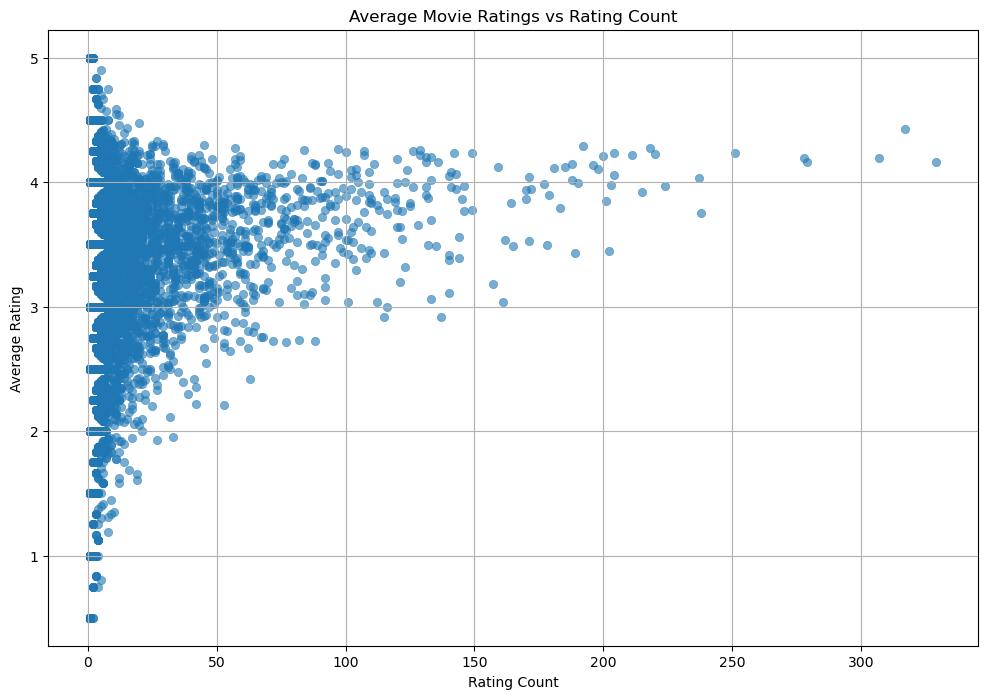

In [19]:
# multivariate analysis of average ratings vs genre vs rating count
plt.figure(figsize=(12, 8))
sns.scatterplot(x='rating_count', y='mean_rating', data=movie_stats, alpha
=0.6, edgecolor=None)
plt.title('Average Movie Ratings vs Rating Count')
plt.xlabel('Rating Count')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()  


### 2.6 Target Distribution
Target = rating

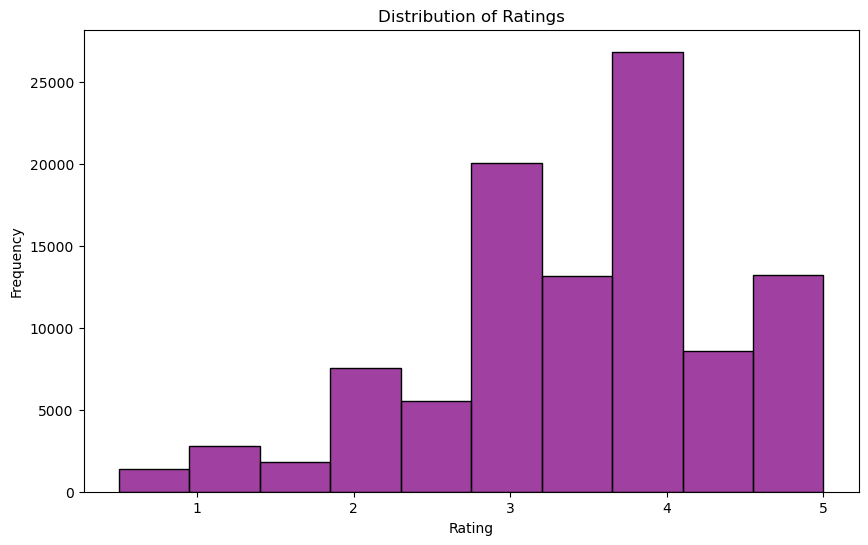

In [20]:
# histogram of ratings(target variable)
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['rating'], bins=10, kde=False, color='purple')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### 2.7 Outlier Detection
##### 2.7.1 User Level Outliers

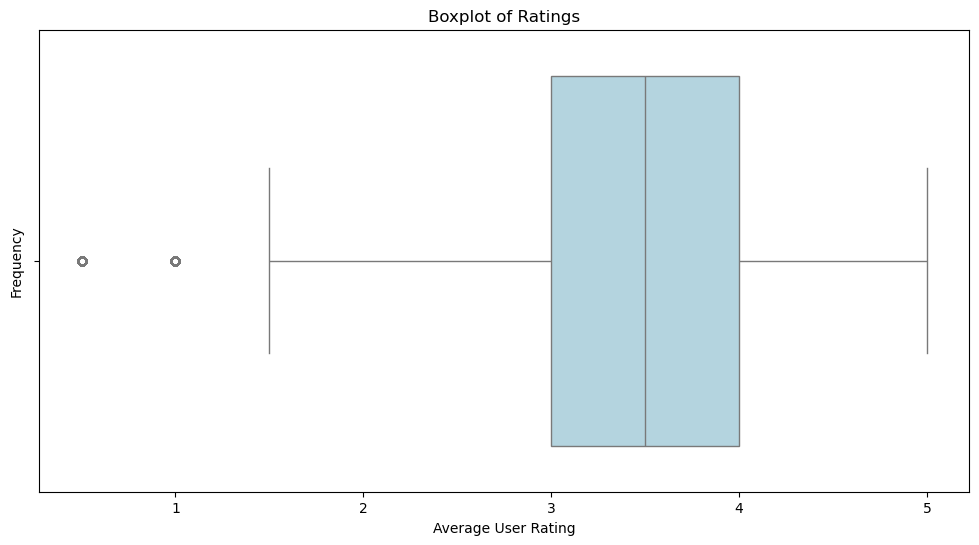

In [21]:
# outliers in user rating behavior
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', data=merged_df, color='lightblue')
plt.title('Boxplot of Ratings')
plt.xlabel('Average User Rating')
plt.ylabel('Frequency')
plt.show()

In [22]:
# remove users with less than 5 ratings
user_counts = merged_df['userId'].value_counts()
valid_users = user_counts[user_counts >= 3].index
filtered_data = merged_df[merged_df['userId'].isin(valid_users)]


#### Observation

##### 2.7.2 Movie-level Outliers

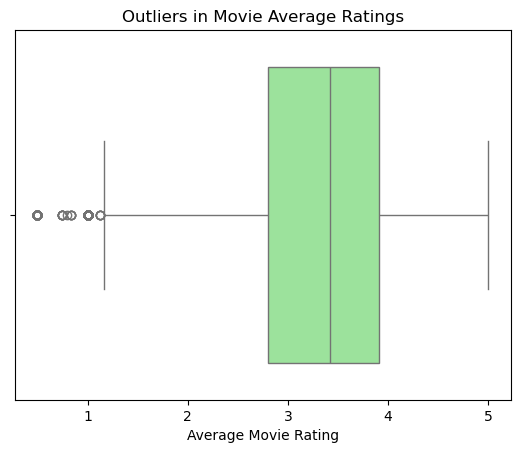

In [23]:
movie_avg = merged_df.groupby('title')['rating'].mean()
sns.boxplot(x=movie_avg, color='lightgreen')
plt.title("Outliers in Movie Average Ratings")
plt.xlabel("Average Movie Rating")
plt.show()


In [24]:
# removing movies with fewer than 5 ratings
movie_counts = merged_df['title'].value_counts()
valid_movies = movie_counts[movie_counts >= 5].index
filtered_data = merged_df[merged_df['title'].isin(valid_movies)]


#### Observation

#### 2.8 Distribution Plots

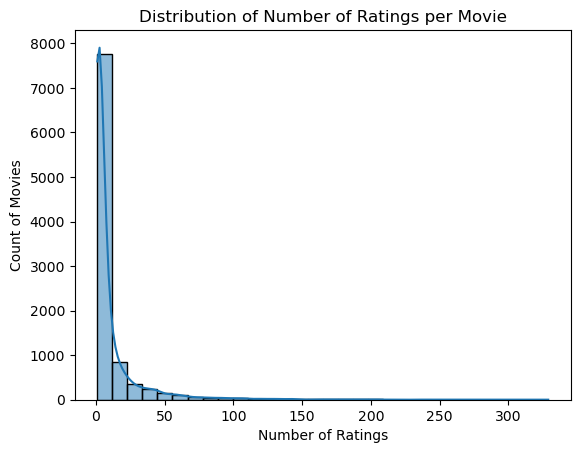

In [25]:
# distribution ratings per movie
num_ratings = merged_df['title'].value_counts()
sns.histplot(num_ratings, bins=30, kde=True)
plt.title("Distribution of Number of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Count of Movies")
plt.show()


#### Observation 
Long tail distribution: few movies are heavily rated 
Most movies receive a small number of ratings
This reinforces the need for collaborative filtering over popularity-based recommendation.

### 3. Data Preprocessing

In [26]:
# data preprocessing for machine learning
user_movie_matrix = merged_df.pivot_table(index='userId', columns='movieId', values='rating')
# Fill NaN values with 0 for the matrix
user_movie_matrix.fillna(0, inplace=True)


* Succesfully created a user-item matrix of shape.
* Missing ratings were filled with 0 to allow for similarity-based calculations
* The matrix is sparse, highlighting the needs for models that can handle missing data

#### 4. Feature Engineering and Scaling
#### 4.1 Feature Engineering
* Feature engineering  is essential for extracting meaningful patterns from user-movie interactions and improving recommendation quality
* Feature engineering makes the data more informative, helping recommendation models deliver more accurate and context-aware movie suggestions.

In [52]:
# feature engineering
movie_stats = merged_df.groupby('movieId').agg({
    'rating': ['mean', 'count']})
movie_stats.columns = ['mean_rating', 'rating_count']
# Merging movie stats with the user-movie matrix
user_movie_matrix = user_movie_matrix.merge(movie_stats, left_index=True, right_index=True)

#### Further Explanation: Feature Engineering
- For each movie, we calculated two important metrics:
  - `mean_rating`: The average rating received
  - `rating_count`: The number of times it has been rated
- These features help distinguish between:
  - Movies that are **consistently liked** (high mean & high count)
  - Movies with **unreliable high/low scores** due to few ratings
- We merged these features into the `user_movie_matrix`, enabling the models to access more informative patterns per movie.
- These features can also be used to:
  - Filter out movies with low rating counts (to reduce noise)
  - Analyze trends in user preferences (e.g., do users prefer popular or niche movies?)


#### 4.2 Feature Scaling

In [54]:
# feature scaling
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)
# Standardizing the features
scaler = sklearn.preprocessing.StandardScaler()
# fit scaler on training data
X_train_scaled = scaler.fit_transform(x_train)
# transform test data using the fitted scaler
X_test_scaled = scaler.transform(x_test)


#### Further Explanation
- Applied `StandardScaler` to standardize all numeric features by removing the mean and scaling to unit variance.

- This was necessary because some features (e.g., rating counts) have much larger numeric ranges than others (like mean ratings).

- Standardizing ensures that **no feature dominates the learning process**, especially in models like:

  - **K-Nearest Neighbors**, which relies on distance
  
- The scaler was **fitted on the training set only**, and then applied to the test set to prevent data leakage—ensuring the model generalizes properly.

#### 5. Modelling
The models used are:
* Decision Tree Regression - Chosen because it captures complex, non-linear relationships between user and movie features. It works well without needing feature scaling and helps understand how different factors influence ratings.

* KNN Regression - Selected because it mimics collaborative filtering by recommending based on user or movie similarity. It’s simple, intuitive, and good for modeling user behavior patterns—especially when ratings are dense enough.

#### Collaborative Filtering Overview

Collaborative Filtering is a technique that predicts user preferences by leveraging past user behavior and similarities between users or items.

In this project, we use **Item-Based Collaborative Filtering**:

- Compute similarity between movies based on user ratings.
- Use these similarities to generate a similarity-weighted rating feature.
- Feed this feature into machine learning models to predict user ratings for unseen movies.

This approach captures patterns in user-item interactions and improves the accuracy of recommendations.

##### 5.1 Compute item-user similarity matrix(cosine similarity)

In [65]:
from sklearn.metrics.pairwise import cosine_similarity

# Create the item-user matrix (movies as rows, users as columns)
item_user_matrix = ratings_df.pivot(index='movieId', columns='userId', values='rating').fillna(0)

# Compute cosine similarity between items (movies)
item_similarity = cosine_similarity(item_user_matrix)

# Put it into a DataFrame for easy lookup
item_similarity_df = pd.DataFrame(item_similarity, index=item_user_matrix.index, columns=item_user_matrix.index)


##### 5.2 Define function to calculate similarity-weighted rating for each(user, movie)

In [66]:

def get_similarity_score(user_id, movie_id, top_n=20):
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    
    if movie_id not in item_similarity_df.columns:
        return np.nan
    
    # Get top N similar movies to movie_id
    similar_movies = item_similarity_df.loc[movie_id].drop(movie_id).nlargest(top_n)
    
    similarities = []
    weighted_ratings = []
    
    for _, row in user_ratings.iterrows():
        other_movie = row['movieId']
        rating = row['rating']
        
        if other_movie in similar_movies.index:
            similarity = similar_movies[other_movie]
            similarities.append(similarity)
            weighted_ratings.append(similarity * rating)
    
    if np.sum(similarities) == 0:
        return np.nan
    
    return np.sum(weighted_ratings) / np.sum(similarities)


In [46]:
ratings_df = ratings_df.sample(n=10000, random_state=42)

In [47]:
print("Generating sim_weighted_rating feature. This may take some time...")
ratings_df['sim_weighted_rating'] = ratings_df.apply(
    lambda row: get_similarity_score(row['userId'], row['movieId']),
    axis=1
)


Generating sim_weighted_rating feature. This may take some time...


In [77]:

# Drop rows where sim_weighted_rating could not be computed
ratings_df = ratings_df.dropna(subset=['sim_weighted_rating'])


##### 5.3 Train/test split

In [78]:
# train/test split
from sklearn.model_selection import train_test_split
x = ratings_df[['sim_weighted_rating']]
y = ratings_df['rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


##### 5.4 Decion tree (Base Model)

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as root_mean_squared_error
# Train a Decision Tree Regressor

dtree = DecisionTreeRegressor(max_depth=5, random_state=42)  # max_depth can be tuned
dtree.fit(x_train, y_train)

# predict on the test set
y_pred_dtree = dtree.predict(x_test)


#### 5.5 KNN Regression 

In [81]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')  # Tune n_neighbors if needed
knn.fit(x_train, y_train)

# Predict
y_pred_knn = knn.predict(x_test)


#### 5.3 Evaluation

In [106]:
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Decision Tree": dtree,
    "KNN": knn
}

metrics = []

for name, model in models.items():
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    metrics.append({
        "Model": name,
        "RMSE": rmse,
        "R²": r2
    })

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


           Model      RMSE        R²
0  Decision Tree  0.852634  0.192809
1            KNN  0.951022 -0.004229


#### Explanation
##### RMSE
Lower RMSE means the model’s predictions are closer to the true values, so it predicts more accurately.

High RMSE means larger errors, indicating the model struggles to fit the data well.

Impact on recommendations:
Models with lower RMSE generate more precise predicted ratings, improving the quality of movie recommendations.

##### R-squared
Higher R² means the model captures more of the underlying patterns in the data.

Lower R² means the model explains less variance, so predictions might be less reliable.

Impact on recommendations:
A higher R² indicates the model better understands user rating behavior, which helps generate more relevant and personalized recommendations.

In [109]:
# best model based on RMSE and R²
best_model = metrics_df.loc[metrics_df['RMSE'].idxmin()]
print(f"Best Model: {best_model['Model']}")
# Save the best model
import joblib
joblib.dump(dtree, 'best_model.pkl')

Best Model: Decision Tree


['best_model.pkl']

#### Plot Evaluation

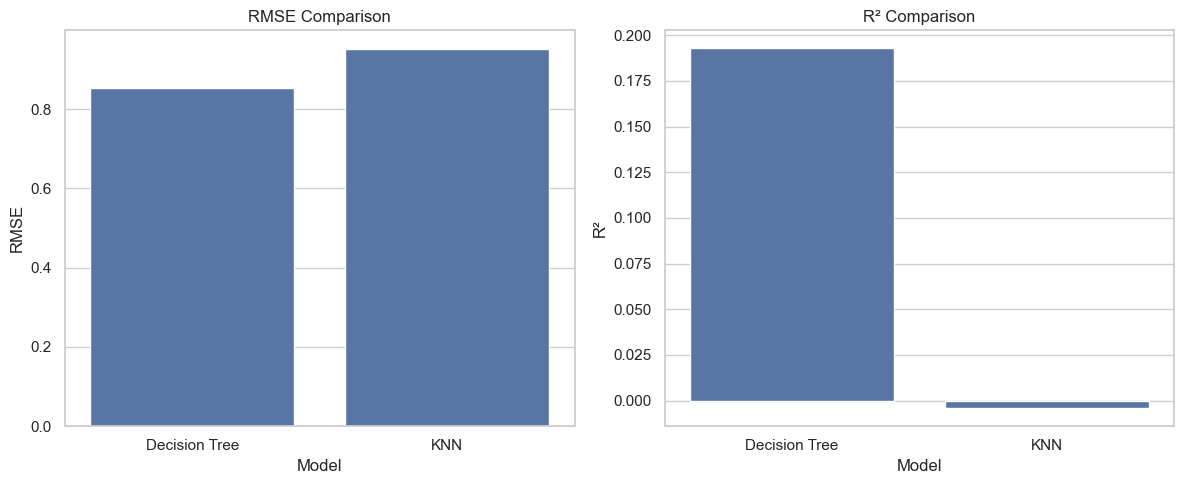

In [110]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=metrics_df, x="Model", y="RMSE", ax=axes[0])
axes[0].set_title("RMSE Comparison")

sns.barplot(data=metrics_df, x="Model", y="R²", ax=axes[1])
axes[1].set_title("R² Comparison")

plt.tight_layout()
plt.show()


#### Observation
The Decision Tree model outperforms KNN with a lower RMSE and higher R², indicating it predicts user ratings more accurately and explains more variance. This suggests Decision Trees handle the data’s patterns better than KNN in this case.

##### 6. Recommendation Function

In [94]:
def recommend_top_movies_with_titles(user_id, model, ratings_df, item_similarity_df, movies_df, top_n=5, top_k_similar=20):
    """
    Recommend top-N movies for a user using a trained model and return movieId, title, and predicted rating.

    Parameters:
    - user_id: int - target user ID
    - model: trained regression model (Ridge, KNN, Decision Tree, etc.)
    - ratings_df: DataFrame with ['userId', 'movieId', 'rating']
    - item_similarity_df: item-item cosine similarity matrix (movieId x movieId)
    - movies_df: DataFrame with ['movieId', 'title']
    - top_n: number of recommendations to return
    - top_k_similar: number of top similar movies to consider

    Returns:
    - DataFrame with columns ['movieId', 'title', 'predicted_rating']
    """


    # Get list of all movie IDs
    all_movie_ids = movies_df['movieId'].unique()

    # Movies user has already rated
    rated_movies = ratings_df[ratings_df['userId'] == user_id]['movieId'].tolist()
    candidate_movies = [m for m in all_movie_ids if m not in rated_movies]

    recommendations = []

    for movie_id in candidate_movies:
        if movie_id not in item_similarity_df.columns:
            continue  # skip if not in similarity matrix

        # Get user's rated movies
        user_ratings = ratings_df[ratings_df['userId'] == user_id]

        # Get top similar movies
        similar_movies = item_similarity_df.loc[movie_id].drop(movie_id).nlargest(top_k_similar)

        similarities = []
        weighted_ratings = []

        for _, row in user_ratings.iterrows():
            other_movie = row['movieId']
            rating = row['rating']
            if other_movie in similar_movies.index:
                sim = similar_movies[other_movie]
                similarities.append(sim)
                weighted_ratings.append(sim * rating)

        if len(similarities) == 0 or np.sum(similarities) == 0:
            continue

        sim_weighted_rating = np.sum(weighted_ratings) / np.sum(similarities)

        # Predict with model
        input_df = pd.DataFrame([[sim_weighted_rating]], columns=['sim_weighted_rating'])
        predicted_rating = model.predict(input_df)[0]

        recommendations.append((movie_id, predicted_rating))

    # Sort by predicted rating
    recommendations.sort(key=lambda x: x[1], reverse=True)
    top_recommendations = recommendations[:top_n]

    # Convert to DataFrame and merge with movie titles
    recommend_df = pd.DataFrame(top_recommendations, columns=['movieId', 'predicted_rating'])
    recommend_df = recommend_df.merge(movies_df[['movieId', 'title']], on='movieId')

    return recommend_df[['movieId', 'title', 'predicted_rating']]


In [111]:
# Call the function
top_5_recommended_movies = recommend_top_movies_with_titles(
    user_id=44,  # Example user ID
    model = dtree,  
    ratings_df = ratings_df,
    item_similarity_df=item_similarity_df,
    movies_df=movies_df,
    top_n=5
)

# View results
print(top_5_recommended_movies)


   movieId                                              title  \
0       11                     American President, The (1995)   
1      193                                   Showgirls (1995)   
2      207                       Walk in the Clouds, A (1995)   
3      280                         Murder in the First (1995)   
4      405  Highlander III: The Sorcerer (a.k.a. Highlande...   

   predicted_rating  
0          3.809698  
1          3.809698  
2          3.809698  
3          3.809698  
4          3.809698  


### 7. Business Insights 
#### 7.1 From Model
* Our analysis shows that the Decision Tree model provides more accurate and personalized movie recommendations compared to simpler approaches, directly enhancing user satisfaction.

* Improved recommendations translate to increased user engagement and longer platform usage, which drives higher lifetime customer value.

* Enhanced personalization supports better customer retention, reducing churn and increasing steady revenue streams.

* By delivering relevant content efficiently, the platform can maximize advertising revenue and subscription growth opportunities.

* Investing in advanced recommendation technology like this positions us for a strong competitive edge in the rapidly growing streaming market, increasing our potential market share and profitability.

#### 7.2 From EDA
* User Engagement is Uneven
Insight: A small percentage of users account for a large portion of the ratings.
Business Takeaway: These are your power users — focus on retaining and rewarding them (e.g., personalized campaigns, early access to new releases).

* Movie Popularity is Skewed
Insight: A handful of movies receive the majority of ratings.
Business Takeaway: These popular movies can be used to attract new users, but recommending only them may lead to redundancy and boredom. A recommendation system must balance popularity with diversity and novelty.

* Ratings Tend to Be High (Positively Skewed)
Insight: Most ratings fall between 3 and 5, with very few ratings below 2.
Business Takeaway: Users may avoid rating movies they dislike. Consider implicit feedback signals (watch time, skips) alongside ratings for a more complete picture of preferences.

* Genres Are Not Rated Equally
Insight: Certain genres like Drama, Comedy, and Action dominate the dataset.
Business Takeaway: These genres could be prioritized for acquisition or marketing, while less-rated genres (e.g., Documentary, War) could be niche recommendations to keep long-tail users engaged.

* Rating Behavior Differs by User
Insight: Some users are harsh, others rate generously.
Business Takeaway: A personalized recommendation model must consider each user’s rating scale. This justifies using models like collaborative filtering or similarity-weighted predictions rather than raw